# Map of 'Gyudon-ya' in Japan

*@rikipafe, August 20 2015*

### Install pre-requisite requirements.
[http://matplotlib.org/basemap/users/installing.html]

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Loading The OpenStreetMap Data with Pandas

* [Open Street Map](http://openstreetmap.org).
* [OSM-x-tractor](http://osm-x-tractor.org/Data.aspx)

In [49]:
import pandas as pd
data = pd.read_csv('POIAsia.csv', nrows=5)
data.columns

Index([u'﻿"osmid"', u'name', u'amenity', u'emergency', u'geological', u'historic', u'leisure', u'man_made', u'office', u'shop', u'sport', u'tourism', u'craft', u'Longitude', u'Latitude'], dtype='object')

In [50]:
columns = ["name", "Longitude", "Latitude"]
data = pd.read_csv('POIAsia.csv', usecols=columns)
data.head()

,name,Longitude,Latitude
0,Sagada Municipal Hall,120.900729,17.084194
1,East Point,120.620201,14.385618
2,Intramuros,120.975330,14.590586
3,NaN,44.397175,33.325580
4,NaN,44.395485,33.325715


In [51]:
with_name = data[data.name.notnull()]

In [52]:
yoshinoya = with_name[with_name.name.str.contains('吉野家')]
matsuya = with_name[with_name.name.str.contains('松屋')]
sukiya = with_name[with_name.name.str.contains('すき家')]

In [53]:
print yoshinoya.name.count(), matsuya.name.count(), sukiya.name.count()

389 664 447


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_JPN():
    """initialize a basemap centered on the continental JPN"""
    plt.figure(figsize=(14, 10))
    return Basemap(projection='lcc', resolution='l',
                   llcrnrlon=125, urcrnrlon=145,
                   llcrnrlat=28, urcrnrlat=42,
                   lat_1=35, lat_2=45, lon_0=135,
                   area_thresh=10000)

In [55]:
def plot_inJPN(store,label,color):
    m = draw_JPN()

    # Draw map background
    m.fillcontinents(color='white', lake_color='#eeeeee')
    m.drawstates(color='lightgray')
    m.drawcoastlines(color='lightgray')
    m.drawcountries(color='lightgray')
    m.drawmapboundary(fill_color='#eeeeee')

    # Plot the values
    style = dict(s=5, marker='o', alpha=0.5, zorder=2)
    m.scatter(store.Longitude.values,
              store.Latitude.values, latlon=True,
              label=label,
              color=color, **style)
    plt.legend(loc='lower right', frameon=False);

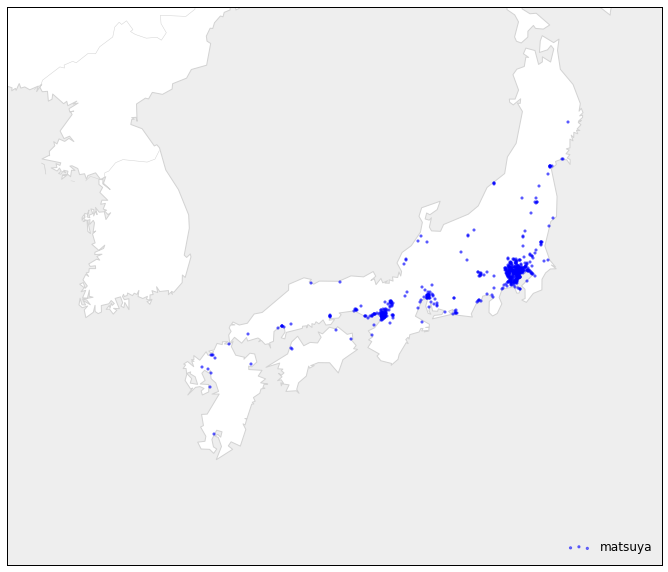

In [56]:
plot_inJPN(matsuya,'matsuya','blue')

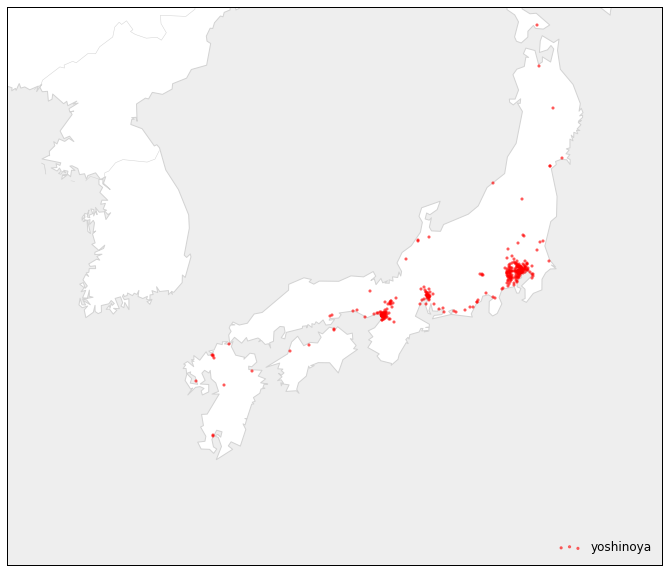

In [57]:
plot_inJPN(yoshinoya,'yoshinoya','red')

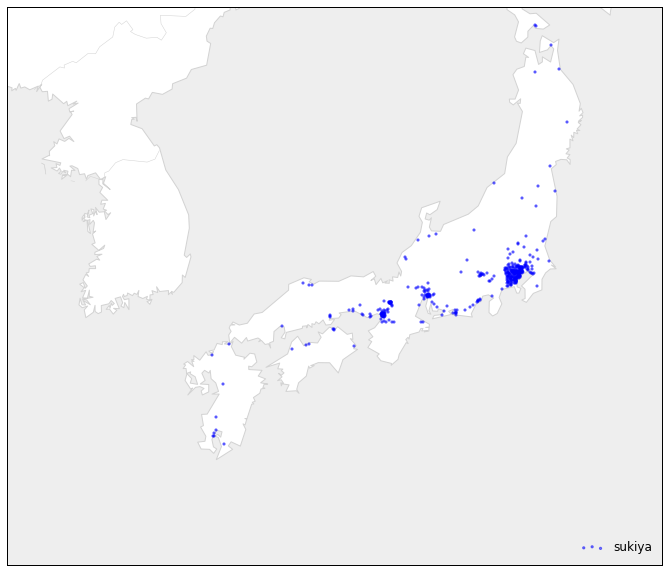

In [58]:
plot_inJPN(sukiya,'sukiya','blue')